## Exercise2
### ZEHUA SHANG (6930321658)

Similarity method : Euclidean distance

Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset/ Using 50 fake news and 50 true news.

Code link: https://github.com/shzhzzz/infosystemlab/blob/master/Excercise2.ipynb

### K-MEANS

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections
from nltk import cluster
from nltk.cluster import euclidean_distance

In [31]:
#load data
path = 'True.csv'
list1 = (pd.read_csv(path).iloc[:50, 1].values).tolist()

path = 'Fake.csv'
list2 = (pd.read_csv(path).iloc[:50, 1].values).tolist()

documents = list1 + list2

print(documents)

['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [32]:
print(documents[99])

People have long speculated about Donald Trump s mental state. While it was once seen as unseemly to suggest that a public figure may be crazy, Trump s alarming behavior warrants an exception   especially since he has the nuclear codes. Well, it s not our imagination   and that s not just because we can see with every wild statement and unhinged Twitter rant that something is wrong with Trump. It s because, according to former Republican Congressman and current host of MSNBC s Morning Joe reported on Thursday that several of Trump s allies confided to him that Trump has dementia.Then, Scarborough went all in, and called for the use of the 25th Amendment to remove Trump, and in doing so, decided to list many of Trump s infamous incidences of con artistry in the process: If this is not what the 25th Amendment was drafted for, I would like the Cabinet members serving America   not the president   you serve America, and you know it. You know you don t serve Donald J. Trump. Scam developer,

In [33]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shzhzzz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shzhzzz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /Users/shzhzzz/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shzhzzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk import word_tokenize

In [38]:
# English stopwords defined by the NLTK package.
en_stop = nltk.corpus.stopwords.words('english')

# Ignore noises that might affect our result.
# Add left " and right " and ’
en_stop = ["``","/",",.",".,",";","--",":",")","(",'"','“','”',"’","",'&',"'",'),',',"','-','.,','.,"','.-','!',"?",">","<",'[',']','$']                  \
         +["0","1","2","3","4","5","6","7","8","9","10","11","12","86","1986","1987","000"]                                                      \
         +["said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"]          \
         +en_stop

In [39]:
from nltk.corpus import wordnet as wn # import for lemmatize

def preprocess_word(word, stopwordset):
    
    #1.convert words to lowercase (e.g., Python =>python)
    word=word.lower()
    
    #2.remove "," and "."
    if word in [",","."]:
        return None
    
    #3.remove stopwords  (e.g., the => (None)) 
    if word in stopwordset:
        return None
    
    #4.lemmatize  (e.g., cooked=>cook)
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    # lemmatized words could be in the stopwords set
    elif lemma in stopwordset: 
        return None
    else:
        return lemma
    

def preprocess_document(document):
    document = word_tokenize(document)
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [52]:
preprocessed_docs = preprocess_documents(documents)
preprocessed_docs

[['washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'u.s.',
  'congress',
  'vote',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'pay',
  'tax',
  'cut',
  'call',
  'fiscal',
  'conservative',
  'sunday',
  'urge',
  'budget',
  'restraint',
  '2018',
  'keeping',
  'sharp',
  'pivot',
  'way',
  'among',
  'republican',
  'u.s.',
  'representative',
  'mark',
  'meadow',
  'speaking',
  'cbs',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmaker',
  'bracing',
  'battle',
  'january',
  'return',
  'holiday',
  'wednesday',
  'lawmaker',
  'begin',
  'try',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'link',
  'issue',
  'immigration',
  'policy',
  'even',
  'november',
  'congressional',
  'election',
  'campaign',
  'approach',
  'republican',
  'seek',
  'keep',
  'control',
  'congress',
  'president',
  'donald',
  'trump',
  'republican',
  'want',
  'big',
  'budget',
  

In [53]:
def tfidf_vectorizer(docs):
  def tf(word2id, doc):
    term_counts = np.zeros(len(word2id))
    for term in word2id.keys():
      term_counts[word2id[term]] = doc.count(term)
    tf_values = list(map(lambda x: x/sum(term_counts), term_counts))
    return tf_values
  
  def idf(word2id, docs):
    idf = np.zeros(len(word2id))
    for term in word2id.keys():
      idf[word2id[term]] = np.log(len(docs) / sum([bool(term in doc) for doc in docs]))
    return idf
  
  word2id = {}
  for doc in docs:
    for w in doc:
      if w not in word2id:
        word2id[w] = len(word2id)
  
  return [[_tf*_idf for _tf, _idf in zip(tf(word2id, doc), idf(word2id, docs))] for doc in docs], word2id

In [59]:
tfidf_vector, word2id = tfidf_vectorizer(preprocessed_docs)
print(tfidf_vector)
print(word2id.items())
tfidf_vectornp = np.array(tfidf_vector)

[[0.00479370833104419, 0.0015825278094975918, 0.005497592713817058, 0.016492778141451177, 0.024133141963224792, 0.008931559373123621, 0.0057979750907394476, 0.006330111237990367, 0.01425249085173213, 0.00325825651972636, 0.006839571400808198, 0.008931559373123621, 0.006710849178351332, 0.012142739894670218, 0.023290192106467517, 0.024604084894367294, 0.014522352987671855, 0.00506238641334069, 0.01577113077393182, 0.012142739894670218, 0.005766503754128437, 0.04002919974109568, 0.010514087182621213, 0.011745194712958401, 0.006839571400808198, 0.0073490315636260285, 0.008005839948219136, 0.003791623759866783, 0.011533007508256874, 0.013827650526299319, 0.011533007508256874, 0.042056348730484854, 0.006839571400808198, 0.026794678119370863, 0.004331324166406122, 0.005039440441072423, 0.006423312138721544, 0.006071369947335109, 0.005766503754128437, 0.008718942985019778, 0.03459902252477062, 0.009316076842587007, 0.010514087182621213, 0.010514087182621213, 0.004331324166406122, 0.0054975927

In [60]:
print(type(tfidf_vector))
print(type(tfidf_vectornp))


<class 'list'>
<class 'numpy.ndarray'>


k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


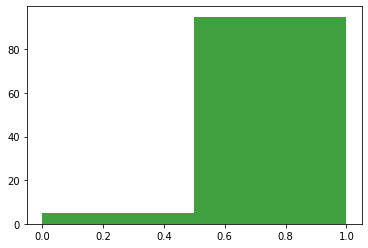

In [90]:
n_clusters = 2

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)

img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


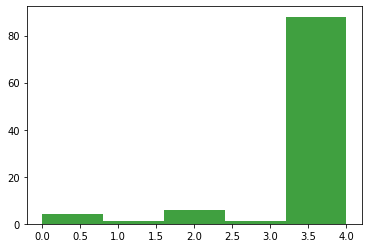

In [91]:
n_clusters = 5

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 0, 2, 4, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


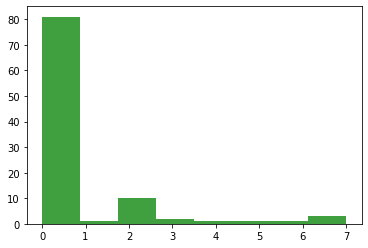

In [92]:
n_clusters = 8

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[3, 19, 17, 17, 3, 3, 3, 16, 5, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 13, 3, 3, 3, 19, 3, 3, 3, 3, 6, 3, 1, 3, 18, 14, 3, 3, 3, 3, 12, 6, 3, 3, 19, 6, 11, 0, 3, 3, 6, 3, 3, 17, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 17, 3, 3, 7, 11, 1, 2, 3, 3, 10, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 1, 3, 3, 3, 3, 3, 3, 15, 3, 15, 15, 3, 3, 3]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


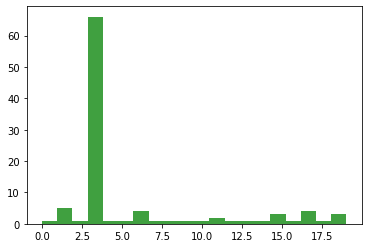

In [93]:
n_clusters = 20

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[41, 37, 2, 2, 10, 7, 7, 41, 41, 3, 49, 41, 29, 26, 41, 8, 7, 27, 7, 1, 42, 7, 7, 31, 48, 41, 41, 41, 41, 46, 49, 46, 33, 41, 36, 42, 9, 9, 21, 9, 41, 30, 18, 9, 13, 41, 41, 14, 9, 9, 19, 45, 41, 44, 38, 22, 7, 41, 43, 17, 0, 6, 46, 2, 41, 39, 23, 20, 25, 13, 35, 5, 12, 16, 7, 7, 4, 32, 41, 41, 41, 15, 40, 28, 7, 25, 25, 47, 11, 41, 41, 7, 41, 7, 41, 7, 7, 34, 24, 7]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


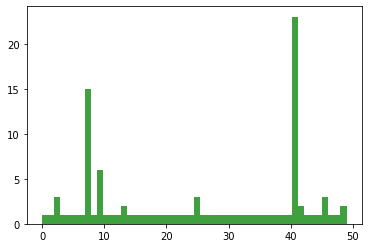

In [94]:
n_clusters = 50

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
[8, 3, 33, 33, 1, 8, 14, 38, 56, 64, 21, 8, 4, 49, 8, 24, 72, 36, 37, 23, 46, 55, 68, 39, 30, 67, 13, 42, 16, 50, 59, 65, 9, 47, 26, 34, 48, 18, 19, 20, 8, 17, 39, 58, 33, 8, 8, 11, 18, 48, 45, 33, 35, 2, 10, 30, 30, 8, 71, 60, 41, 40, 63, 6, 52, 43, 5, 7, 53, 73, 69, 30, 53, 61, 29, 29, 8, 54, 28, 8, 8, 30, 32, 62, 30, 57, 44, 27, 22, 25, 66, 70, 74, 15, 12, 15, 31, 8, 0, 51]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


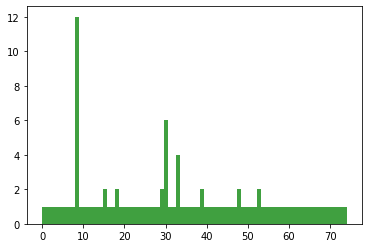

In [95]:
n_clusters = 75

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

k-means trial 0
[63, 17, 91, 53, 88, 92, 24, 84, 16, 89, 50, 82, 57, 14, 19, 52, 39, 54, 71, 31, 69, 56, 13, 96, 11, 72, 73, 93, 45, 51, 22, 5, 40, 27, 41, 28, 87, 34, 25, 30, 1, 66, 55, 95, 46, 79, 75, 68, 60, 99, 65, 32, 49, 36, 15, 59, 67, 3, 37, 29, 38, 83, 26, 90, 12, 44, 86, 7, 42, 2, 0, 35, 74, 4, 97, 47, 94, 20, 48, 9, 21, 81, 70, 77, 98, 10, 80, 85, 61, 58, 6, 33, 18, 62, 23, 64, 43, 76, 78, 8]


/Users/shzhzzz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


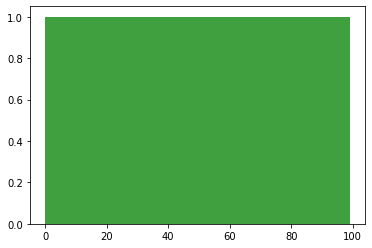

In [96]:
n_clusters = 100

kmeans = cluster.KMeansClusterer(n_clusters, euclidean_distance, avoid_empty_clusters=True, conv_test=1e-4)  
clusters = kmeans.cluster(tfidf_vectornp, True, trace=True) 
print(clusters)


img=np.array(clusters)    

plt.figure("lena")           
arr=img.flatten()          
n, bins, patches = plt.hist(arr, bins=n_clusters, normed=0, facecolor='green', alpha=0.75)  
plt.show()

### LDA

In [76]:
import gensim
from gensim import corpora

In [77]:
# build the dictionary
dictionary = corpora.Dictionary(preprocessed_docs)
# construct the 
corpus_ = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [78]:
# token2id is the attribute which indicates the mapping between words and dictionary ID

print(dictionary.token2id)

{'...': 0, '1.5': 1, '20': 2, '2018': 3, '30': 4, '44': 5, '81': 6, 'action': 7, 'add': 8, 'administration': 9, 'agree': 10, 'aid': 11, 'aides': 12, 'already': 13, 'also': 14, 'among': 15, 'approach': 16, 'approve': 17, 'arrival': 18, 'assist': 19, 'assistance': 20, 'back': 21, 'balloon': 22, 'battle': 23, 'begin': 24, 'big': 25, 'bill': 26, 'boost': 27, 'border': 28, 'borrow': 29, 'bracing': 30, 'bring': 31, 'budget': 32, 'california': 33, 'call': 34, 'campaign': 35, 'caucus': 36, 'cbs': 37, 'chairman': 38, 'change': 39, 'child': 40, 'childhood': 41, 'clean': 42, 'clear': 43, 'come': 44, 'congress': 45, 'congressional': 46, 'conservative': 47, 'control': 48, 'corporation': 49, 'country': 50, 'create': 51, 'crowley': 52, 'cut': 53, 'daca': 54, 'date': 55, 'debbie': 56, 'debt': 57, 'debt-financed': 58, 'december': 59, 'defend': 60, 'defer': 61, 'deficit': 62, 'democrat': 63, 'democratic': 64, 'deportation': 65, 'dingell': 66, 'disabled': 67, 'discretionary': 68, 'discus': 69, 'donald': 

In [79]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=20,
                                           id2word=dictionary,
                                           alpha=0.1,                 # optional LDA hyperparameter alpha
                                           eta=0.1,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

In [80]:
# the top num_words of words for each topic (topic ID, the word generative probability for the topic).

topics = ldamodel.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.006*"trump" + 0.005*"republican" + 0.003*"new" + 0.003*"president" + 0.003*"tax" + 0.003*"donald" + 0.003*"house" + 0.003*"u.s." + 0.003*"@" + 0.003*"would" + 0.003*"immigration" + 0.003*"state" + 0.003*"democrat" + 0.002*"child" + 0.002*"also"')
(1, '0.017*"trump" + 0.006*"house" + 0.005*"@" + 0.005*"donald" + 0.005*"senate" + 0.004*"state" + 0.004*"would" + 0.004*"republican" + 0.004*"u.s." + 0.004*"moore" + 0.004*"also" + 0.004*"white" + 0.004*"president" + 0.003*"country" + 0.003*"tax"')
(2, '0.012*"trump" + 0.009*"moore" + 0.007*"republican" + 0.006*"state" + 0.005*"alabama" + 0.005*"@" + 0.005*"image" + 0.005*"people" + 0.004*"u.s." + 0.004*"president" + 0.004*"donald" + 0.004*"december" + 0.004*"house" + 0.003*"refugee" + 0.003*"court"')
(3, '0.013*"trump" + 0.007*"president" + 0.006*"@" + 0.005*"u.s." + 0.005*"republican" + 0.005*"office" + 0.004*"moore" + 0.004*"fbi" + 0.004*"new" + 0.004*"state" + 0.004*"image" + 0.003*"even" + 0.003*"donald" + 0.003*"december" + 0.003

In [85]:
# for each document, show the probabilities of topics which beyond the minimum_probability [(topic ID, probability)]

for n,item in enumerate(corpus_):
    print("document ID "+str(n)+":" ,end="")
    print(ldamodel.get_document_topics(item))

document ID 0:[(1, 0.2813873), (3, 0.06190907), (8, 0.1415552), (12, 0.01894759), (13, 0.48347187)]
document ID 1:[(6, 0.9948056)]
document ID 2:[(15, 0.99257314)]
document ID 3:[(15, 0.9916587)]
document ID 4:[(3, 0.47278446), (15, 0.492348), (16, 0.031258937)]
document ID 5:[(8, 0.9947323)]
document ID 6:[(7, 0.26310062), (8, 0.7308297)]
document ID 7:[(3, 0.9778993)]
document ID 8:[(3, 0.6929011), (13, 0.27757457)]
document ID 9:[(2, 0.955799)]
document ID 10:[(2, 0.3929247), (3, 0.21559139), (6, 0.38378477)]
document ID 11:[(6, 0.35458094), (19, 0.64072186)]
document ID 12:[(15, 0.96778244)]
document ID 13:[(8, 0.98537445)]
document ID 14:[(6, 0.990856)]
document ID 15:[(6, 0.9927063)]
document ID 16:[(3, 0.039871354), (15, 0.9556489)]
document ID 17:[(16, 0.9818966)]
document ID 18:[(4, 0.99236536)]
document ID 19:[(6, 0.9863212)]
document ID 20:[(10, 0.9940396)]
document ID 21:[(0, 0.6259734), (3, 0.033673946), (10, 0.12755337), (12, 0.18532468), (15, 0.024553603)]
document ID 22

In [88]:
!pip install pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [89]:
#k=20
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [97]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=2,
                                           id2word=dictionary,
                                           alpha=0.1,                 # optional LDA hyperparameter alpha
                                           eta=0.1,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [98]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=10,
                                           id2word=dictionary,
                                           alpha=0.1,                 # optional LDA hyperparameter alpha
                                           eta=0.1,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [99]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=50,
                                           id2word=dictionary,
                                           alpha=0.1,                 # optional LDA hyperparameter alpha
                                           eta=0.1,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [100]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=100,
                                           id2word=dictionary,
                                           alpha=0.1,                 # optional LDA hyperparameter alpha
                                           eta=0.1,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

### Consideration

In Section 2-A, I tried for several k = 2, 5, 8, 20, 50, 75, 100. You can see the results (in the figure format) above.

When comparing the results with different k, I found that no matter how k changes, there is always one cluster that contains significantly large number of documents (except for k = 100). I think this is because most of the documents come from news with President Trump.

This is not a good result but I think this may have some inherent deviations about variety of news (politics News or world News) or related people (President Trump or other people). 

In k = 100 case, each document belongs to one cluster. This is because it starts with distinct doucments and then to converge. if k = 100, we will stop immediately.

While in Section 2-B, I tried for k = 2, 10, 20, 50, 100. You can also check the pyLDAvis result.

In the k=2 case, you can see the documents are divided into 2 parts of nearly same size (40.7% and 59.3%). I think this is a good result because it may represent that using LDA we may divide the dataset as Fake News or True News. 

In the other cases, you can also find that in k = 50 case, there are already some topics which donot contain any tokens (documents). This implies that the number of possible topics is bigger than 20 but less than 50. 

In k = 100 case, it is different from k-means for it putting some documents into the same topic. This shows a difference between k-means and LDA.